In [34]:
import pandas as pd 
import numpy as np 
from data import split_data
import os 
import joblib 
import pmdarima as pm

In [31]:
data_directory = 'data'
aggregation = 'day'
transformation = 'log'

train, test = split_data(data_directory , 
               train_date = (2018, 8, 1), aggreagation = 'day', transformation = 'log')

33.757902524017084

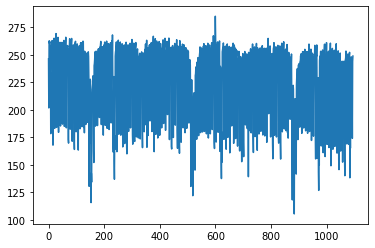

In [41]:
train['(04107) escuela militar'].plot()#[train['(04107) escuela militar'].isnull()]
train['(04107) escuela militar'].std()

In [48]:
s = train['(04107) escuela militar']
model = pm.auto_arima(s, start_p=2, d=None, start_q=2, max_p=10, max_q=10,
                        srtart_P=1, start_Q = 1, max_P = 5, max_Q = 5, m = 7, seasonal=True, 
                        stepwise=True, suppress_warnings=False, error_action='trace')

/Users/juandavidcaicedocastro/anaconda3/envs/prediction/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/juandavidcaicedocastro/anaconda3/envs/prediction/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/juandavidcaicedocastro/anaconda3/envs/prediction/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/juandavidcaicedocastro/anaconda3/envs/prediction/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization 

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1096
Model:             SARIMAX(6, 1, 0)x(3, 0, 0, 7)   Log Likelihood               -4993.209
Date:                           Tue, 02 Nov 2021   AIC                          10006.418
Time:                                   13:50:37   BIC                          10056.403
Sample:                                        0   HQIC                         10025.332
                                          - 1096                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6050      0.024    -24.792      0.000      -0.653      -0.557
ar.L2         -0.4227      0.042    -10.053      0.000      -0.505      -0.340
ar.L3         -0.4026      0.036    -11.304      0.000      -0.472      -0.333
ar.L4         -0.3310      0.036     -9.219      0.000      -0.401      -0.261
ar.L5         -0.2422      0.045     -5.413      0.000      -0.330      -0.155
ar.L6         -0.1273      0.035     -3.622      0.000      -0.196      -0.058
ar.S.L7        0.2665      0.035      7.640      0.000       0.198       0.335
ar.S.L14       0.2221      0.023      9.639      0.000       0.177       0.267
ar.S.L21       0.3150      0.023     13.483      0.000       0.269       0.361
sigma2       531.1647     15.986     33.226      0.000     499.832     562.498
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              1462.05
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                            -0.99
Prob(H) (two-sided):                  0.33   Kurtosis:                         8.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1096
Model:             SARIMAX(6, 1, 0)x(3, 0, 0, 7)   Log Likelihood               -4993.209
Date:                           Tue, 02 Nov 2021   AIC                          10006.418
Time:                                   12:54:57   BIC                          10056.403
Sample:                                        0   HQIC                         10025.332
                                          - 1096                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6050      0.024    -24.792      0.000      -0.653      -0.557
ar.L2         -0.4227      0.042    -10.053      0.000      -0.505      -0.340
ar.L3         -0.4026      0.036    -11.304      0.000      -0.472      -0.333
ar.L4         -0.3310      0.036     -9.219      0.000      -0.401      -0.261
ar.L5         -0.2422      0.045     -5.413      0.000      -0.330      -0.155
ar.L6         -0.1273      0.035     -3.622      0.000      -0.196      -0.058
ar.S.L7        0.2665      0.035      7.640      0.000       0.198       0.335
ar.S.L14       0.2221      0.023      9.639      0.000       0.177       0.267
ar.S.L21       0.3150      0.023     13.483      0.000       0.269       0.361
sigma2       531.1647     15.986     33.226      0.000     499.832     562.498
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              1462.05
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                            -0.99
Prob(H) (two-sided):                  0.33   Kurtosis:                         8.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
def read_plk(directory):
    fpath = os.path.join(directory)
    plk = joblib.load(fpath)
    return plk

In [24]:
model = read_plk('output/sarima/models/day/train/(04107) escuela militar.pkl')

In [25]:
model.summary()

/Users/juandavidcaicedocastro/anaconda3/envs/prediction/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:2937: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
/Users/juandavidcaicedocastro/anaconda3/envs/prediction/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3108: RuntimeWarning: invalid value encountered in double_scalars
  test_statistic = np.sum(numer_resid) / np.sum(denom_resid)
/Users/juandavidcaicedocastro/anaconda3/envs/prediction/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:677: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1096
Model:             SARIMAX(1, 0, 0)x(2, 0, [1], 7)   Log Likelihood                   0.000
Date:                             Tue, 02 Nov 2021   AIC                             12.000
Time:                                     12:30:10   BIC                             41.997
Sample:                                          0   HQIC                            23.350
                                            - 1096                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    199.6233         -0       -inf      0.000     199.623     199.623
ar.L1          0.9630   2.12e-10   4.54e+09      0.000       0.963       0.963
ar.S.L7     1.016e-05         -0       -inf      0.000    1.02e-05    1.02e-05
ar.S.L14       1.0000   2.22e-14    4.5e+13      0.000       1.000       1.000
ma.S.L7        0.8667         -0       -inf      0.000       0.867       0.867
sigma2      4.648e+04         -0       -inf      0.000    4.65e+04    4.65e+04
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):               411.00
Prob(Q):                               nan   Prob(JB):                         0.00
Heteroskedasticity (H):                nan   Skew:                             0.00
Prob(H) (two-sided):                   nan   Kurtosis:                         0.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [19]:
model.summary()

/Users/juandavidcaicedocastro/anaconda3/envs/prediction/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:2937: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
/Users/juandavidcaicedocastro/anaconda3/envs/prediction/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3108: RuntimeWarning: invalid value encountered in double_scalars
  test_statistic = np.sum(numer_resid) / np.sum(denom_resid)
/Users/juandavidcaicedocastro/anaconda3/envs/prediction/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:677: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1096
Model:             SARIMAX(1, 0, 0)x(2, 0, [1], 7)   Log Likelihood                   0.000
Date:                             Tue, 02 Nov 2021   AIC                             12.000
Time:                                     12:19:33   BIC                             41.997
Sample:                                          0   HQIC                            23.350
                                            - 1096                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    199.6233         -0       -inf      0.000     199.623     199.623
ar.L1          0.9630   2.12e-10   4.54e+09      0.000       0.963       0.963
ar.S.L7     1.016e-05         -0       -inf      0.000    1.02e-05    1.02e-05
ar.S.L14       1.0000   2.22e-14    4.5e+13      0.000       1.000       1.000
ma.S.L7        0.8667         -0       -inf      0.000       0.867       0.867
sigma2      4.648e+04         -0       -inf      0.000    4.65e+04    4.65e+04
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):               411.00
Prob(Q):                               nan   Prob(JB):                         0.00
Heteroskedasticity (H):                nan   Skew:                             0.00
Prob(H) (two-sided):                   nan   Kurtosis:                         0.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""